In [125]:
import numpy as np


class Aligner:

    def __init__(self, seq1, seq2, gapPenalty, missPenalty, matchScore):
        self.seqAlignments = []
        self.seq1 = seq1
        self.seq2 = seq2
        self.gapPenalty = gapPenalty
        self.missPenalty = missPenalty
        self.matchScore = matchScore
        self.alignMatrix = np.zeros(
            (len(self.seq1)+1, len(self.seq2)+1), dtype=int)
        self.traceBackMatrix = np.zeros(
            (len(self.seq1)+1, len(self.seq2)+1), dtype='U4')
        self.indexToTrace = {
            0: "d",
            1: "l",
            2: "u",
            3: "f"
        }
        self.finalScore = 0
        self.identity = 0

        
    def getValue(self, i, j):
        if self.seq1[i-1] == self.seq2[j-1]:
            missOrMatch = self.matchScore
        else:
            missOrMatch = self.missPenalty

        possibleValues = [
            self.alignMatrix[i-1][j-1] + missOrMatch,
            self.alignMatrix[i][j-1] + self.gapPenalty,
            self.alignMatrix[i-1][j] + self.gapPenalty,
            0
        ]

        return max(possibleValues), possibleValues.index(max(possibleValues))


    def align(self):

        for row in self.traceBackMatrix:
            row[0] = "f"

        for i in range(len(self.traceBackMatrix[0])):
            self.traceBackMatrix[0][i] = "f"
        self.traceBackMatrix[0][0] = "f"


        for i, j in np.ndindex(self.alignMatrix.shape):
            if i == 0:
                continue
            if j == 0:
                continue

            self.alignMatrix[i][j], index = self.getValue(i, j)
            self.traceBackMatrix[i][j] = self.indexToTrace[index]
        
        # Find maximum value from the matrix
        self.finalScore = np.amax(self.alignMatrix)
        # Find index of maximum value from 2D numpy array
        self.maxIndexes = np.where(self.alignMatrix == self.finalScore)

        self.sliceMatrix()

    
    
    
    def sliceMatrix(self):
            
        listOfCoordinates = list(zip(self.maxIndexes[0], self.maxIndexes[1]))
        
        # make an alignment for each maximum value
        for coord in listOfCoordinates:
            self.slicedAlignMatrix = self.alignMatrix[0:coord[0]+1, 0:coord[1]+1]
            self.makeAlignment()
        
        
        
    def makeAlignment(self):

        s1 = ''
        s2 = ''

        i = self.slicedAlignMatrix.shape[0] - 1
        j = self.slicedAlignMatrix.shape[1] - 1
        print("Indexes from score matrix: (%d, %d)" %(i, j))
        alignType = self.traceBackMatrix[i][j]

        while alignType != 'f':

            if alignType == 'd':
                s1 = self.seq1[i-1] + s1
                s2 = self.seq2[j-1] + s2
                i -= 1
                j -= 1

            if alignType == 'l':
                s1 = '-' + s1
                s2 = self.seq2[j-1] + s2
                j -= 1

            if alignType == 'u':
                s1 = self.seq1[i-1] + s1
                s2 = '-' + s2
                i -= 1

            alignType = self.traceBackMatrix[i][j]

        self.s1 = s1
        self.s2 = s2
        self.getIdentity()
        self.printResults()


    def getIdentity(self):

        ident = 0

        for i in range(len(self.s1)):
            if self.s1[i] == self.s2[i]:
                ident += 1

        totalPositions = max([len(self.seq1), len(self.seq2)])
        self.identity = ident/totalPositions

        
    def printResults(self):
        
        lastI = self.slicedAlignMatrix.shape[0] -1
        lastJ = self.slicedAlignMatrix.shape[1] -1
        
        firstI = lastI - len(self.s1)
        firstJ = lastJ - len(self.s2)
        
        
        
        print(self.slicedAlignMatrix[firstI:, firstJ:], '\n')
        print(self.s1)
        print(self.s2, '\n')
        print('Final Score:', self.finalScore)
        print('Identity:', self.identity)
        print('\n\n\n')

In [126]:
file1 = open("hemoglobins/human.txt","r")
human = file1.read()
file1.close()
print(human)

MEKVPGEMEIERRERSEELSEAERKAVQAMWARLYANCEDVGVAILVRFFVNFPSAKQYFSQFKHMEDPLEMERSPQLRKHACRVMGALNTVVENLHDPDKVSSVLALVGKAHALKHKVEPVYFKILSGVILEVVAEEFASDFPPETQRAWAKLRGLIYSHVTAAYKEVGWVQQVPNATTPPATLPSSGP


In [127]:
file1 = open("hemoglobins/biomphalaria.txt","r")
biomphalaria = file1.read()
file1.close()
print(biomphalaria)

MFVLKGSVVQAFVLLSIVCLEITIADDGVRYVNAEWKRPEQSQEGRHSCTARRLEDNSEEVACSTEVKFRQRAPAEYANKIKKAKDKLRRLESQFDDCQQENDRKDRLIQLQANLTDTIHRLVTDSDIQALRSSWATLTAGADGRNNFGNNFVLWLLNTIPNIRERFEKFNAHQSDEALKNDNEFVKQVKLIVGGLQSFIDNLENPGQLQATIERLASVHLKMRPTIGLEYFRPLQENIAQYVASALGVGADDAAPKAWERLLNAFNEVLNSFANYNIGLSDTDKVALQSSWSRLTAGADGKRNAGVRLVLWMFNNVPNMRERFTKFNARQSDEALKTDAEFLKQVDAIIGGFETLINNLNDADLLLNRLESLADEHLEKKPAISSNYFGPLQKNIHLFIEGTLNFGSDSDEARAWTHLVGALNKVIKDHAIHNLGLSDIDRDALVSSWNQLTGRAGGSRNAGTNLVLWMLENVPNMRDQFSKFNARQSDDNLRKDAEFVRQVDLITGGLESLVDNVNNPIFLQEALVRLADAHLNLKPRVGLEYFGPLQRYIHAYIEKALGVSADSAAPRAWTDLLTAFNNVLKDRTFLRIVSDDDRRALQSSWSRLQSQAGNKQEAGIKLVTWLFDNVPNMRDRFTKFNAHSSDEALRANNEFLRQVDVIVGGLDSLINNVDNSDNFQAAIERLVDVHLHMSPSVGLEYFGPLQQNIRSYIQNALGVAADSAEARSWTNLFTAFNEFLADHTIQKIGLSPTDRKVLDRTWKQLTSGGKQEAGVKLVLWMFDQVPNMRDQFSKFDARKSEAELRNDAEFINQVNNIVGGLDSILNNLDKPGQLQAALERLADYHLDHKPRIGLEFFGPLQKYIHLYIESALNVAVGSEESRAWTDLLTALNKVIRDHAIDRLGLSDNDREAIDSSWKKLRSGAGGRRNAGIKLVQWMLRTIPNMRDRFNKFDAKQSDAALQRDPEFLAQVDRILGGVESLVNNVDDPVALKAAIDRLAD

In [128]:
gap = -2
match = 1
missmatch = -1


aligner = Aligner(human, biomphalaria, gap, missmatch, match)
aligner.align()

aligner.printResults()

Indexes from score matrix: (23, 803)
[[0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 2 0 1]
 [0 0 0 3 1]
 [0 0 1 1 4]] 

SEAE
SEAE 

Final Score: 4
Identity: 0.00186219739292365




Indexes from score matrix: (26, 2005)
[[0 0 0 1 3 1 0 0 0]
 [0 1 0 0 1 2 0 0 0]
 [0 0 2 0 0 0 1 0 0]
 [0 0 0 3 1 0 0 0 0]
 [0 0 0 1 2 0 0 0 1]
 [0 0 0 1 2 1 0 0 0]
 [0 0 0 0 0 1 2 0 0]
 [0 0 0 0 0 0 0 3 1]
 [0 0 0 0 0 0 0 1 4]] 

LSEAERKA
LSEEDRKA 

Final Score: 4
Identity: 0.002793296089385475




Indexes from score matrix: (90, 424)
[[0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 2 0 0]
 [0 0 0 3 1]
 [0 0 0 1 4]] 

GALN
GALN 

Final Score: 4
Identity: 0.00186219739292365




Indexes from score matrix: (92, 426)
[[0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 3 1 0 0]
 [0 0 0 1 4 2 0]
 [0 0 0 0 2 3 1]
 [1 0 0 0 0 1 4]] 

GALNTV
GALNKV 

Final Score: 4
Identity: 0.0023277467411545625




Indexes from score matrix: (177, 787)
[[0 1 0 0 0]
 [0 1 0 0 0]
 [0 0 2 0 0]
 [0 0 0 3 1]
 [0 0 0 1 4]] 

QVPN
QVPN 

Final Score: 4
Identity:

In [ ]:
aligner.maxIndexes

In [66]:
print(aligner.slicedAlignMatrix.shape[0], aligner.slicedAlignMatrix.shape[1])

91 425


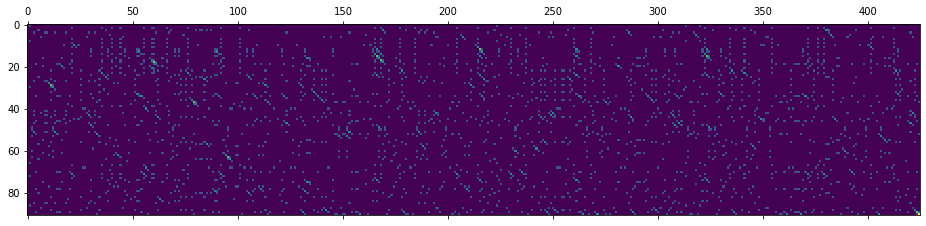

<Figure size 432x288 with 0 Axes>

In [67]:
import numpy as np
import matplotlib.pyplot as plt

plt.matshow(aligner.slicedAlignMatrix)
plt.show()
plt.savefig('test.png')

In [ ]:
aligner.alignMatrix

In [24]:
bestVal = (0, 0)
bestKey = ''
draws = []

for key, value in scores.items():
    
    if value[0] > bestVal[0]:
        bestVal = value
        bestKey = key
        draws = []
    
    elif value[0] == bestVal[0]:
        if value[1] > bestVal[1]:
            bestVal = value
            bestKey = key
            draws = []
            
        elif value[1] == bestVal[1]:
            draws.append(key)

In [25]:
print(bestVal, bestKey)

(560, 0.8723404255319149) human vs cow


In [26]:
print(draws)

['human vs horse']


In [27]:
print("\nThe best score was achieved when "+bestKey +
          " were compared. \nObtained score:", scores[bestKey][0], "\nObtained identity:", scores[bestKey][1])


The best score was achieved when human vs cow were compared. 
Obtained score: 560 
Obtained identity: 0.8723404255319149


In [28]:
print("\nMore than one sequence aligment produced the same final score and identity.\n")
print(bestKey,"- (score, identity):", scores[bestKey])

for d in draws:
    print(d,"- (score, identity):", scores[d])


More than one sequence aligment produced the same final score and identity.

human vs cow - (score, identity): (560, 0.8723404255319149)
human vs horse - (score, identity): (560, 0.8723404255319149)
